In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
trade_data = pd.read_csv('Capstone Data.csv')
print(trade_data.head())

               When 1st Level 2nd Level Side  TH  Strength  Contracts  \
0  12/29/2023 13:59    -0.99%     0.16%    B   4        55         10   
1  12/29/2023 13:59    -0.99%     0.16%    B   4        55         10   
2  12/29/2023 13:31     0.03%    -5.42%    A   0       260          1   
3  12/29/2023 13:31     0.03%    -5.42%    A   0       260          1   
4   12/29/2023 9:29    -0.38%     0.36%    B   4        35          1   

  Gross Profit Net Profit     SPX       NDX     VIX     SPY    TLT  
0            9       7.84  4772.17  16828.29   12.4  475.36  98.92  
1            0          0  4772.17  16828.29   12.4  475.36  98.92  
2            3       1.56  4773.65  16840.69  12.49  475.53  99.06  
3            0          0  4773.65  16840.69  12.49  475.53  99.06  
4            2       0.56  4758.01  16759.11  13.15  473.97  99.44  


# Data Cleaning
- Converting 'When' from type obj to DateTime and extracting data/time features
- Calculating rate of change for market data
- Converting any obj type cols to numeric
- Splitting into 2 dfs: Side A and Side B

In [4]:
trade_data['When'] = pd.to_datetime(trade_data['When'])
trade_data['Year'] = trade_data['When'].dt.year
trade_data['Month'] = trade_data['When'].dt.month
trade_data['Day'] = trade_data['When'].dt.day
trade_data['Hour'] = trade_data['When'].dt.hour
trade_data['Minute'] = trade_data['When'].dt.minute
trade_data['DayOfWeek'] = trade_data['When'].dt.dayofweek

In [5]:
market_cols = [' SPX ', ' NDX ', 'VIX', 'SPY', 'TLT']

# Convert Market Data Columns to Floats
for col in market_cols:
    trade_data[col] = pd.to_numeric(trade_data[col], errors='coerce')

# Calculating rate of change
for col in market_cols:
    trade_data[f'{col}_Change'] = trade_data[col].pct_change()
    
    
trade_data.head()

,When,1st Level,2nd Level,Side,TH,Strength,Contracts,Gross Profit,Net Profit,SPX,...,Month,Day,Hour,Minute,DayOfWeek,SPX _Change,NDX _Change,VIX_Change,SPY_Change,TLT_Change
0,2023-12-29 13:59:00,-0.99%,0.16%,B,4,55,10,9,7.84,4772.17,...,12,29,13,59,4,NaN,NaN,NaN,NaN,NaN
1,2023-12-29 13:59:00,-0.99%,0.16%,B,4,55,10,0,0,4772.17,...,12,29,13,59,4,0.000000,0.000000,0.000000,0.000000,0.000000
2,2023-12-29 13:31:00,0.03%,-5.42%,A,0,260,1,3,1.56,4773.65,...,12,29,13,31,4,0.000310,0.000737,0.007258,0.000358,0.001415
3,2023-12-29 13:31:00,0.03%,-5.42%,A,0,260,1,0,0,4773.65,...,12,29,13,31,4,0.000000,0.000000,0.000000,0.000000,0.000000
4,2023-12-29 09:29:00,-0.38%,0.36%,B,4,35,1,2,0.56,4758.01,...,12,29,9,29,4,-0.003276,-0.004844,0.052842,-0.003281,0.003836


In [6]:
trade_data.replace(['#VALUE!', '#DIV/0!'], pd.NA, inplace=True)  # Replace with NA
trade_data.dropna(inplace=True)  # Drop rows with NA

# Convert '1st lvl' to numeric
trade_data['1st Level'] = trade_data['1st Level'].str.replace('%', '').astype(float) 
# trade_data['1st Level'] = pd.to_numeric(trade_data['1st Level'])

# Convert '2nd lvl' to numeric
trade_data['2nd Level'] = trade_data['2nd Level'].str.replace('%', '').astype(float)
# trade_data['2nd Level'] = pd.to_numeric(trade_data['2nd Level'])

# Convert 'Gross Profit' to numeric
trade_data['Gross Profit'] = pd.to_numeric(trade_data['Gross Profit'])

# Convert 'Net Profit' to numeric
trade_data['Net Profit'] = pd.to_numeric(trade_data['Net Profit'])

In [7]:
# Splitting into sides A/B
trade_data_A = trade_data[trade_data['Side'].isin(['A'])]
trade_data_A.drop(columns=['Side'], inplace=True)

trade_data_B = trade_data[trade_data['Side'].isin(['B'])]
trade_data_B.drop(columns=['Side'], inplace=True)

/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/1033784865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_data_A.drop(columns=['Side'], inplace=True)
/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/1033784865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_data_B.drop(columns=['Side'], inplace=True)


# Visualizing Correlations

- Side A

- Side B

Nothing really meaningful found, I'll try a non-linear approach first

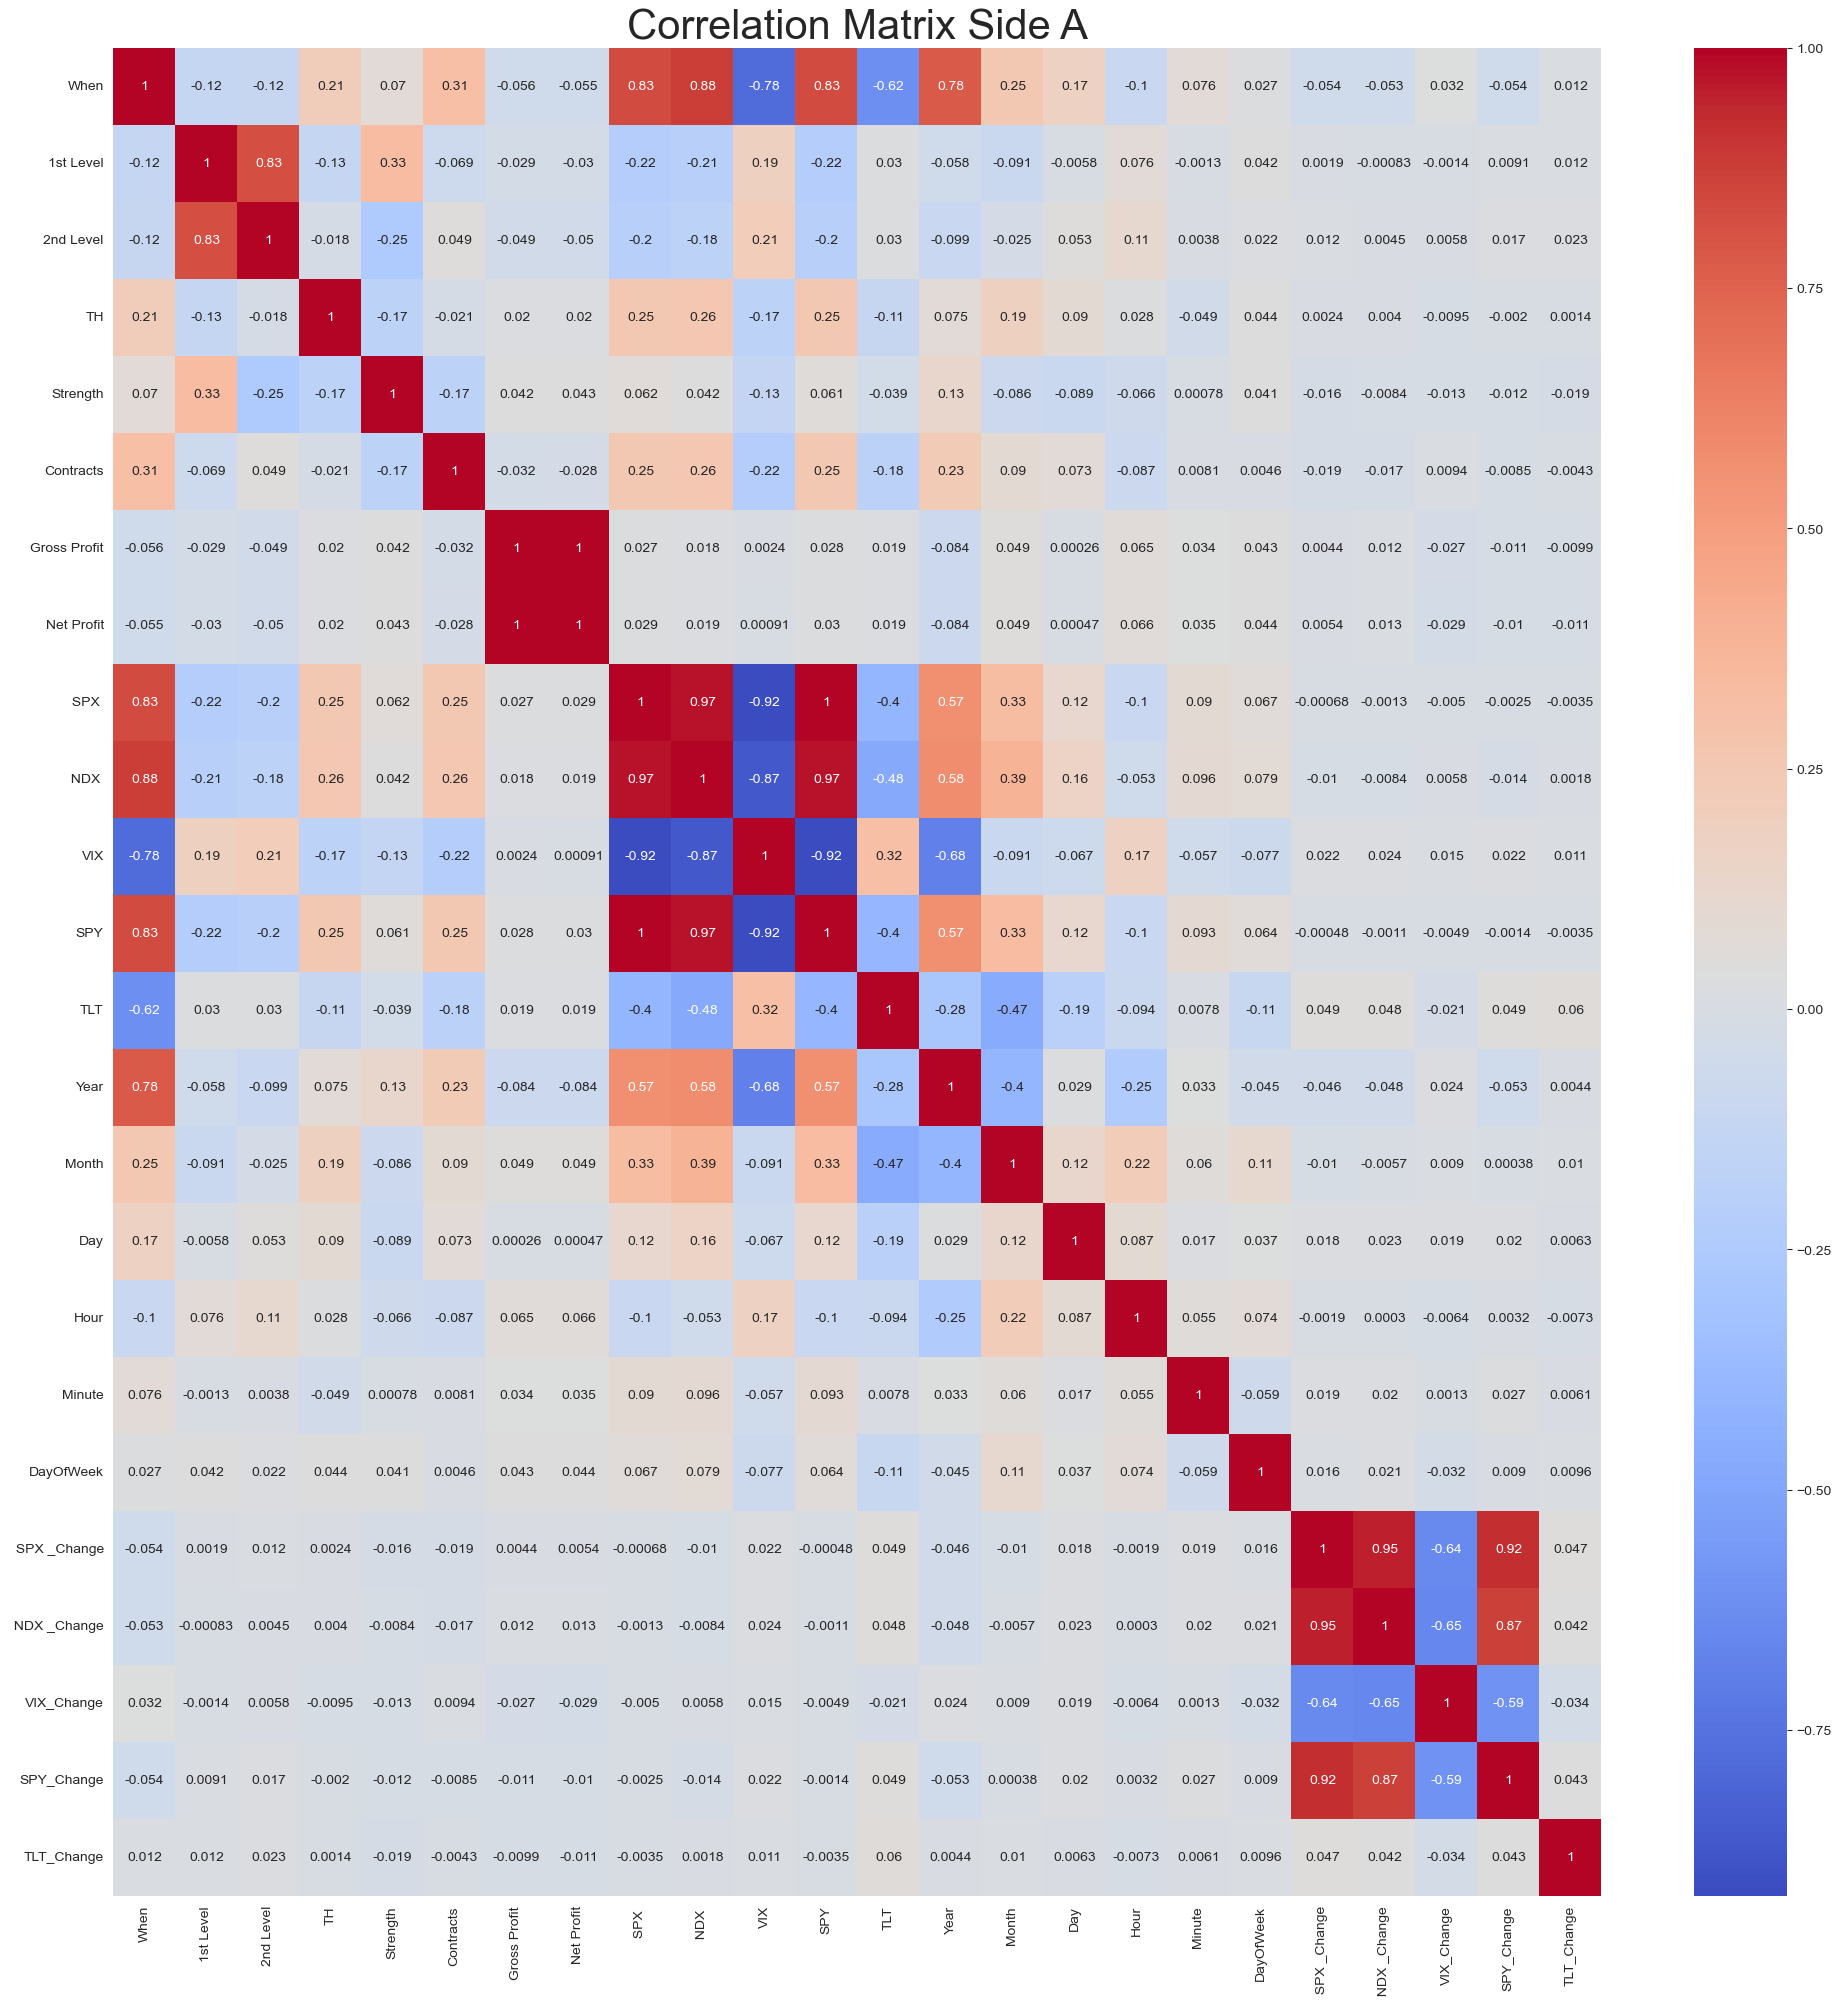

In [8]:
correlation_matrix_A = trade_data_A.corr()
plt.figure(figsize = (24,24))
sns.heatmap(correlation_matrix_A, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Side A', fontsize=30)
plt.show()

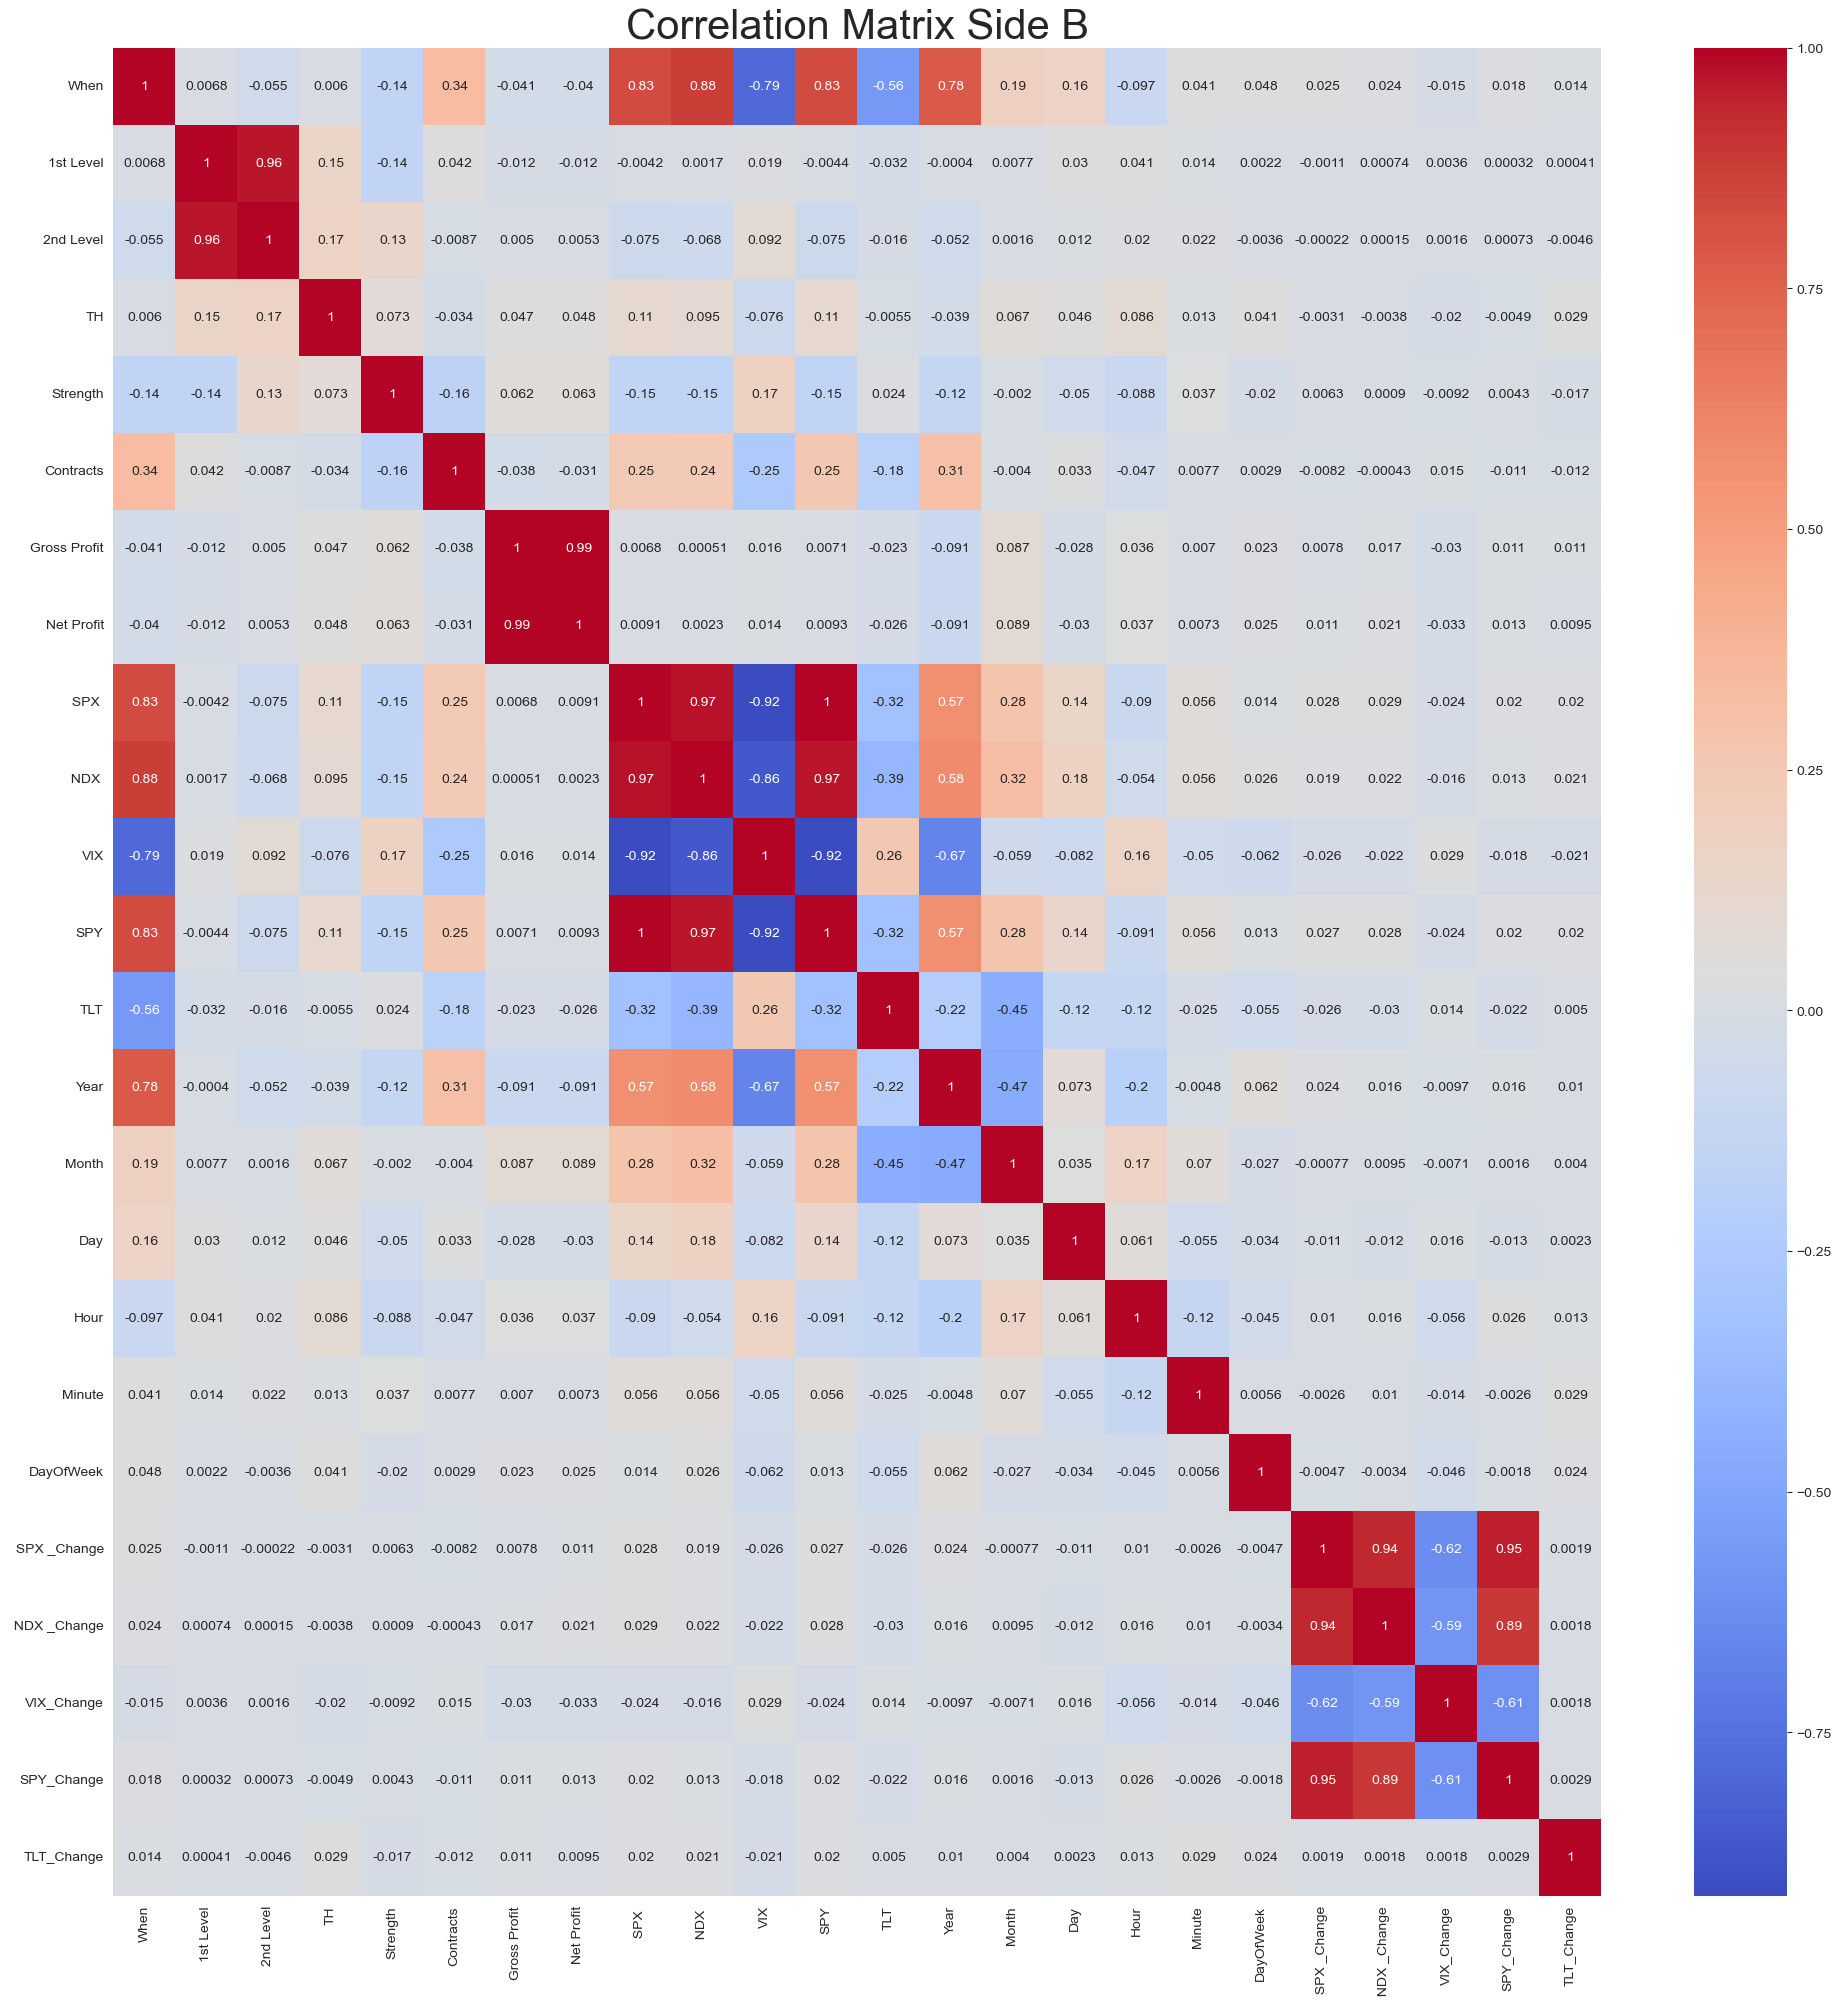

In [9]:
correlation_matrix_B = trade_data_B.corr()
plt.figure(figsize = (24,24)) 
sns.heatmap(correlation_matrix_B, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Side B', fontsize=30)
plt.show()

# News Sentiment

In [10]:
sentiment_data = pd.read_csv('news_sentiment_data.csv')
sentiment_data.dtypes

When               object
News Sentiment    float64
dtype: object

In [11]:
sentiment_data['When'] = pd.to_datetime(sentiment_data['When'])
sentiment_data.dtypes

When              datetime64[ns]
News Sentiment           float64
dtype: object

In [12]:
trade_data['When_date'] = trade_data['When'].dt.date
sentiment_data['When_date'] = sentiment_data['When'].dt.date

In [13]:
df_merged = pd.merge(trade_data, sentiment_data, left_on='When_date', right_on='When_date', how='left')
df_merged.drop(columns=['When_date'])
df_merged.head()

,When_x,1st Level,2nd Level,Side,TH,Strength,Contracts,Gross Profit,Net Profit,SPX,...,Minute,DayOfWeek,SPX _Change,NDX _Change,VIX_Change,SPY_Change,TLT_Change,When_date,When_y,News Sentiment
0,2023-12-29 13:59:00,-0.99,0.16,B,4,55,10,0,0.00,4772.17,...,59,4,0.000000,0.000000,0.000000,0.000000,0.000000,2023-12-29,2023-12-29,0.13
1,2023-12-29 13:31:00,0.03,-5.42,A,0,260,1,3,1.56,4773.65,...,31,4,0.000310,0.000737,0.007258,0.000358,0.001415,2023-12-29,2023-12-29,0.13
2,2023-12-29 13:31:00,0.03,-5.42,A,0,260,1,0,0.00,4773.65,...,31,4,0.000000,0.000000,0.000000,0.000000,0.000000,2023-12-29,2023-12-29,0.13
3,2023-12-29 09:29:00,-0.38,0.36,B,4,35,1,2,0.56,4758.01,...,29,4,-0.003276,-0.004844,0.052842,-0.003281,0.003836,2023-12-29,2023-12-29,0.13
4,2023-12-29 09:29:00,-0.38,0.36,B,4,35,1,0,0.00,4758.01,...,29,4,0.000000,0.000000,0.000000,0.000000,0.000000,2023-12-29,2023-12-29,0.13


In [14]:
# Splitting into sides A/B
merged_data_A = df_merged[df_merged['Side'].isin(['A'])]
merged_data_A.drop(columns=['Side', 'When_date', 'When_y'], inplace=True)

merged_data_B = df_merged[df_merged['Side'].isin(['B'])]
merged_data_B.drop(columns=['Side', 'When_date', 'When_y'], inplace=True)



/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/2406386042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_A.drop(columns=['Side', 'When_date', 'When_y'], inplace=True)
/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/2406386042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_B.drop(columns=['Side', 'When_date', 'When_y'], inplace=True)


In [15]:
corrmatA = merged_data_A.corr()
corrmatA['News Sentiment']

When_x            0.505879
1st Level        -0.097284
2nd Level        -0.053444
TH                0.173403
Strength         -0.027465
Contracts         0.231467
Gross Profit      0.007338
Net Profit        0.008647
 SPX              0.492801
 NDX              0.487663
VIX              -0.295845
SPY               0.496344
TLT              -0.382754
Year              0.221418
Month             0.395613
Day               0.127812
Hour              0.041106
Minute            0.053970
DayOfWeek         0.025459
 SPX _Change      0.008613
 NDX _Change      0.011601
VIX_Change        0.000077
SPY_Change        0.005163
TLT_Change        0.003660
News Sentiment    1.000000
Name: News Sentiment, dtype: float64

In [16]:
corrmatB = merged_data_B.corr()
corrmatB['News Sentiment']

When_x            0.424656
1st Level         0.050915
2nd Level         0.036476
TH                0.070955
Strength         -0.011636
Contracts         0.213012
Gross Profit     -0.003231
Net Profit       -0.001208
 SPX              0.424375
 NDX              0.382743
VIX              -0.247371
SPY               0.425842
TLT              -0.269861
Year              0.232405
Month             0.235314
Day               0.024074
Hour             -0.005976
Minute            0.040939
DayOfWeek         0.034254
 SPX _Change      0.024048
 NDX _Change      0.023435
VIX_Change       -0.025823
SPY_Change        0.020820
TLT_Change        0.010942
News Sentiment    1.000000
Name: News Sentiment, dtype: float64

# Segment Analysis

In [17]:
merged_data_A['VIX'].describe()

count    3350.000000
mean       19.709445
std         5.314679
min        12.030000
25%        16.315000
50%        18.400000
75%        23.115000
max        33.970000
Name: VIX, dtype: float64

In [18]:
merged_data_A['News Sentiment'].describe()

count    3350.000000
mean       -0.110710
std         0.119754
min        -0.430000
25%        -0.200000
50%        -0.090000
75%        -0.020000
max         0.140000
Name: News Sentiment, dtype: float64

In [19]:
# Convert 'SPX' to categorical based on its median to indicate market conditions: above median = 'High', below median = 'Low'
df_merged['Market_Condition'] = pd.qcut(df_merged[' SPX '], 2, labels=['Low', 'High'])
merged_data_A['Market_Condition'] = pd.qcut(df_merged[' SPX '], 2, labels=['Low', 'High'])
merged_data_B['Market_Condition'] = pd.qcut(df_merged[' SPX '], 2, labels=['Low', 'High'])

/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/2014983146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_A['Market_Condition'] = pd.qcut(df_merged[' SPX '], 2, labels=['Low', 'High'])
/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/2014983146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_B['Market_Condition'] = pd.qcut(df_merged[' SPX '], 2, labels=['Low', 'High'])


/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/3090203845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_A['News_Sentiment_Bin'] = pd.qcut(merged_data_A['News Sentiment'], 4, labels=['Negative', 'Slightly Negative', 'Slightly Positive', 'Positive'])
/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/3090203845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_B['News_Sentiment_Bin'] = pd.qcut(merged_data_B['News Sentiment'], 4, labels=['Negative',

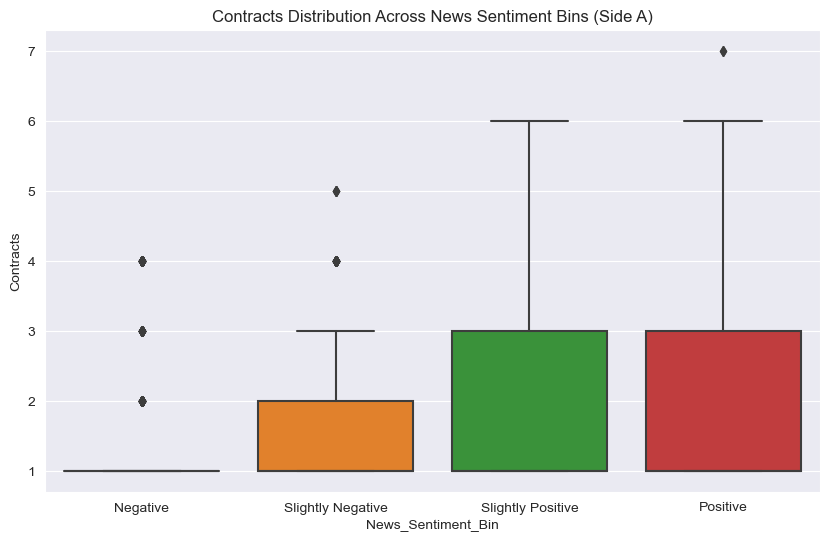

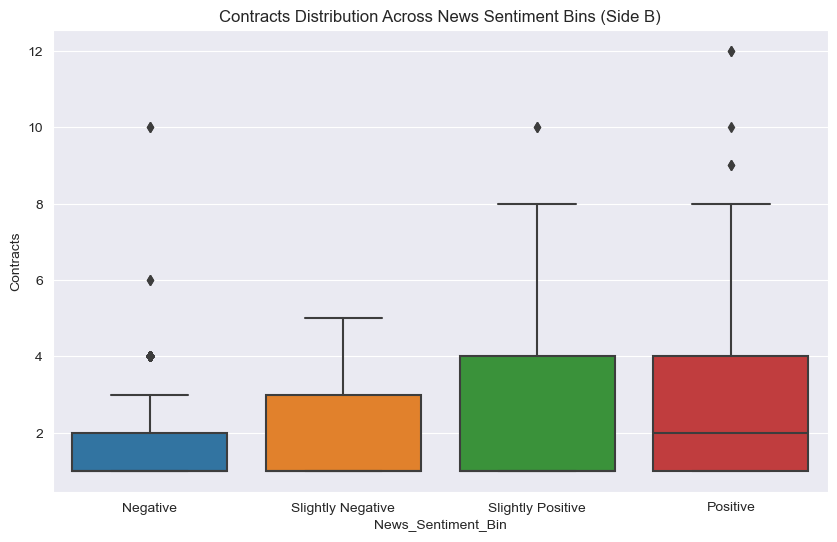

In [20]:
merged_data_A['News_Sentiment_Bin'] = pd.qcut(merged_data_A['News Sentiment'], 4, labels=['Negative', 'Slightly Negative', 'Slightly Positive', 'Positive'])

merged_data_B['News_Sentiment_Bin'] = pd.qcut(merged_data_B['News Sentiment'], 4, labels=['Negative', 'Slightly Negative', 'Slightly Positive', 'Positive'])

# Box Plot for News Sentiment Bins vs Contracts (SIDE A)
plt.figure(figsize=(10, 6))
sns.boxplot(x='News_Sentiment_Bin', y='Contracts', data=merged_data_A)
plt.title('Contracts Distribution Across News Sentiment Bins (Side A)')
plt.show()

# Box Plot for News Sentiment Bins vs Contracts (SIDE B)
plt.figure(figsize=(10, 6))
sns.boxplot(x='News_Sentiment_Bin', y='Contracts', data=merged_data_B)
plt.title('Contracts Distribution Across News Sentiment Bins (Side B)')
plt.show()


In [21]:
#
#
# Variables 2 explor:
# Consumer Confidence Index
# 
#
#
#
#
#
#
#
#
#
#


In [22]:
merged_data_A['When_x'].describe()

count                             3350
mean     2023-04-29 01:58:28.226865664
min                2022-05-27 13:56:00
25%                2023-02-11 08:03:45
50%                2023-04-17 13:23:00
75%                2023-08-31 03:30:00
max                2023-12-29 13:31:00
Name: When_x, dtype: object

In [24]:
cci = pd.read_csv('ConsumerConfidence.csv')
cci['When_x'] = pd.to_datetime(cci['When_x'])
cci

When_x        datetime64[ns]
confidence           float64
dtype: object

In [52]:
df_merged['When_date'] = df_merged['When_x'].dt.date
cci['When_date'] = cci['When_x'].dt.date
df_merged_cci = pd.merge(df_merged, cci,on='When_date')
df_merged_cci.drop(columns=['When_date'])
df_merged_cci.drop(columns=['When_x_y'])
df_merged_cci.rename(columns={'When_x_x':'When'})
df_merged_cci.tail()

,When_x_x,1st Level,2nd Level,Side,TH,Strength,Contracts,Gross Profit,Net Profit,SPX,...,NDX _Change,VIX_Change,SPY_Change,TLT_Change,When_date,When_y,News Sentiment,Market_Condition,When_x_y,confidence
169,2022-07-01 09:16:00,-1.6,0.12,B,0,65,1,3,1.69,3780.41,...,0.00000,0.000000,0.000000,0.00000,2022-07-01,2022-07-01,-0.18,Low,2022-07-01,96.193232
170,2022-07-01 09:16:00,-1.6,0.39,B,0,75,1,3,1.69,3780.41,...,0.00000,0.000000,0.000000,0.00000,2022-07-01,2022-07-01,-0.18,Low,2022-07-01,96.193232
171,2022-07-01 09:16:00,-1.6,-0.14,B,0,55,1,3,1.69,3780.41,...,0.00000,0.000000,0.000000,0.00000,2022-07-01,2022-07-01,-0.18,Low,2022-07-01,96.193232
172,2022-07-01 09:05:00,-1.2,-2.66,A,0,55,1,0,0.00,3765.20,...,-0.00459,0.014973,-0.004114,0.00181,2022-07-01,2022-07-01,-0.18,Low,2022-07-01,96.193232
173,2022-07-01 09:05:00,-1.2,-2.66,A,0,55,1,3,1.71,3765.20,...,0.00000,0.000000,0.000000,0.00000,2022-07-01,2022-07-01,-0.18,Low,2022-07-01,96.193232


In [55]:
# Splitting into sides A/B
merged_data_A = df_merged_cci[df_merged_cci['Side'].isin(['A'])]
merged_data_A.drop(columns=['Side'], inplace=True)

merged_data_B = df_merged_cci[df_merged_cci['Side'].isin(['B'])]
merged_data_B.drop(columns=['Side'], inplace=True)


corrmatAA = merged_data_A.corr()
print(corrmatAA['confidence'])

/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/3728757194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_A.drop(columns=['Side'], inplace=True)
/var/folders/k5/jnmt4nm109q482l9q434lxvm0000gn/T/ipykernel_1307/3728757194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_B.drop(columns=['Side'], inplace=True)


TypeError: float() argument must be a string or a number, not 'datetime.date'

In [1]:
from fredapi import Fred
fred = Fred(api_key='3191131e76f2a5752f4f16f04b87ec0c')
data = fred.get_series('')

In [2]:
data 

2014-03-05    1873.81
2014-03-06    1877.03
2014-03-07    1878.04
2014-03-10    1877.17
2014-03-11    1867.63
               ...   
2024-02-27    5078.18
2024-02-28    5069.76
2024-02-29    5096.27
2024-03-01    5137.08
2024-03-04    5130.95
Length: 2609, dtype: float64